In [373]:
import torch
import numpy as np
import pandas as pd
import os
import random
from typing import Tuple

from PIL import Image

from torchvision.transforms import v2
from torch.utils.data import Dataset

import plotly.express as px
import plotly.graph_objects as go

In [43]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [611]:
img_size = 224

In [44]:
csv_dir = "latex_strings"

dfs = []
for filename in os.listdir(csv_dir):
     if filename[-3:] == "csv":
        # with open(os.path.join(csv_dir, filename)) as fp:
        #     nlines = sum(1 for line in fp)
        # if nlines > 1:
        #     print(filename)
        try:
            df = pd.read_csv(os.path.join(csv_dir, filename))
            dfs.append(df)
        except:
            print(f"Couldn't parse file {filename}")

Couldn't parse file 30_St_Mary_Axe.csv
Couldn't parse file 3D_printing.csv
Couldn't parse file Alan_Turing.csv
Couldn't parse file Albert_Einstein.csv
Couldn't parse file American_English.csv
Couldn't parse file American_Mathematical_Society.csv
Couldn't parse file Anarchism.csv
Couldn't parse file Ancient_Egyptian_architecture.csv
Couldn't parse file Anecdote.csv
Couldn't parse file Apple.csv
Couldn't parse file Applied_mathematics.csv
Couldn't parse file Architect.csv
Couldn't parse file Architecture_of_India.csv
Couldn't parse file Aristid_Lindenmayer.csv
Couldn't parse file Artificial_intelligence.csv
Couldn't parse file Astronomer.csv
Couldn't parse file Astronomy.csv
Couldn't parse file Balance_scale.csv
Couldn't parse file Barchan.csv
Couldn't parse file Bell_Labs.csv
Couldn't parse file Beno%C3%AEt_Mandelbrot.csv
Couldn't parse file Berlin.csv
Couldn't parse file Bletchley_Park.csv
Couldn't parse file British_English.csv
Couldn't parse file Building.csv
Couldn't parse file Casp

In [45]:
len(dfs)

342

In [622]:
latex_strings = pd.concat(dfs)
len(latex_strings)

21695

In [55]:
img_dir = "latex_images"

def get_image(name):
    return Image.open(os.path.join(img_dir, name + ".png"))

In [476]:
sizes = []
for img in latex_strings["name"]:
    i = get_image(img)
    sizes.append(i.size)

In [618]:
filtered_latex_strings = latex_strings[[(s[0] < img_size and s[1] < img_size) for s in sizes]]

In [620]:
len(filtered_latex_strings)

19906

In [557]:
def random_pad(image, final_width, final_height):
    c, h, w = image.size()
    hp1 = random.randint(0, (final_width - w))
    vp1 = random.randint(0, (final_height - h))
    hp2 = final_width - w - hp1
    vp2 = final_height - h - vp1
    
    padding = (hp1, vp1, hp2, vp2)
    
    return v2.functional.pad(image, padding, 255, 'constant')

In [971]:
data_transform = v2.Compose([
    v2.ToImage(),
    v2.Lambda(lambda x: random_pad(x, 224, 224)),
    v2.Grayscale(),
])

In [419]:
class LatexImages(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, label_df, img_dir, img_transform=None, label_transform=None) -> None:

        self.label_df = label_df
        self.img_dir = img_dir
        self.img_transform = img_transform
        self.label_transform = label_transform

    @staticmethod
    def load_image(name: str) -> Image.Image:
        "Opens an image via a path and returns it."
        return Image.open(name)
    
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.label_df)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        row = self.label_df.iloc[index]
        label = row["latex"]
        img = self.load_image(os.path.join(self.img_dir, row["name"] + ".png"))
        
        # Transform if necessary
        if self.img_transform:
            img = self.img_transform(img)
        if self.label_transform:
            label = self.label_transform(label)
            
        return img, label # return data, label (X, y)

In [972]:
msk = np.random.rand(len(filtered_latex_strings)) < 0.8

train_data = LatexImages(filtered_latex_strings[msk], "latex_images", data_transform, lambda x: x[15:-1])
test_data = LatexImages(filtered_latex_strings[~msk], "latex_images", data_transform, lambda x: x[15:-1])

In [625]:
len(train_data), len(test_data)

(15967, 3939)

n


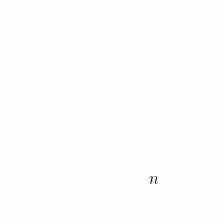

In [973]:
data, label = train_data[random.randint(0, len(train_data))]
print(label)
v2.ToPILImage()(data)

\|f\|_{p}:=\left(\int _{\Omega }|f(x)|^{p}\,{d\mu (x)}\right)^{\frac {1}{p}}.


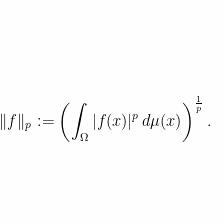

In [988]:
data, label = test_data[random.randint(0, len(test_data))]
print(label)
v2.ToPILImage()(data)